<a href="https://colab.research.google.com/github/andresramirez6-droid/Parcial_2_C.D/blob/master/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Se crea el DataFrame con los datos dados
data = {
    'Producto': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Ventas': [120, 340, 290, 410, 150, 380],
    'Costo': [80, 200, 180, 260, 90, 240],
    'Categoria': ['Tecnología', 'Hogar', 'Tecnología', 'Hogar', 'Oficina', 'Tecnología'],
    'Mes': ['Enero', 'Enero', 'Febrero', 'Febrero', 'Marzo', 'Marzo']
}

df = pd.DataFrame(data)

# Se convierte la columna 'Ventas' del DataFrame en un arreglo de NumPy
ventas_np = np.array(df["Ventas"])

# np.mean() calcula el promedio de los valores del arreglo
promedio_ventas = np.mean(ventas_np)

# np.max() obtiene el valor máximo del arreglo
max_ventas = np.max(ventas_np)

# np.min() obtiene el valor mínimo del arreglo
min_ventas = np.min(ventas_np)

# Se imprimen los resultados
print("Promedio de ventas:", promedio_ventas)
print("Venta máxima:", max_ventas)
print("Venta mínima:", min_ventas)


Promedio de ventas: 281.6666666666667
Venta máxima: 410
Venta mínima: 120


In [6]:

df = pd.DataFrame(data)

ventas_np = np.array(df["Ventas"])
indicador_ventas = (ventas_np > 300).astype(int)

print(indicador_ventas)


[0 1 0 1 0 1]


In [8]:
df["Ganancia"] = df["Ventas"] - df["Costo"]

df.head()

df[df["Ganancia"] > 100]


,Producto,Ventas,Costo,Categoria,Mes,Ganancia
1,B,340,200,Hogar,Enero,140
2,C,290,180,Tecnología,Febrero,110
3,D,410,260,Hogar,Febrero,150
5,F,380,240,Tecnología,Marzo,140


In [9]:
df[
    (df["Categoria"] == "Tecnología") &
    (df["Ventas"] > 300)
][["Producto", "Ventas", "Ganancia"]]


,Producto,Ventas,Ganancia
5,F,380,140


In [10]:
# Se agrupan los datos por el mes
# sum() se usa para obtener el total de ventas realizadas en cada mes
# mean() se usa para calcular el promedio de la ganancia en cada mes

agrupado_mes = df.groupby("Mes").agg(
    Ventas_Totales=("Ventas", "sum"),
    Ganancia_Promedio=("Ganancia", "mean")
)

agrupado_mes


,Ventas_Totales,Ganancia_Promedio
Mes,,
Enero,460,90.0
Febrero,700,130.0
Marzo,530,100.0


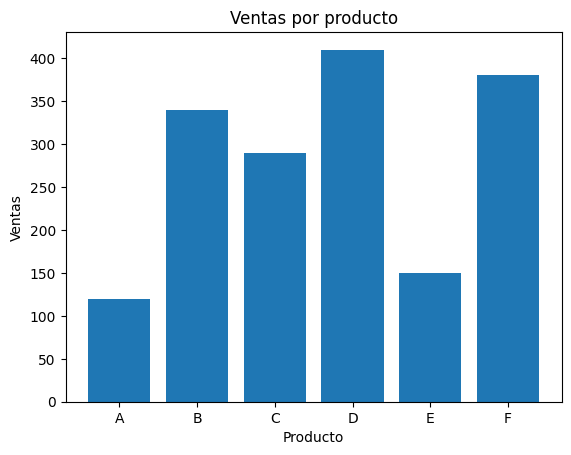

In [15]:


plt.figure()
plt.bar(df["Producto"], df["Ventas"])
plt.title("Ventas por producto")
plt.xlabel("Producto")
plt.ylabel("Ventas")
plt.show()



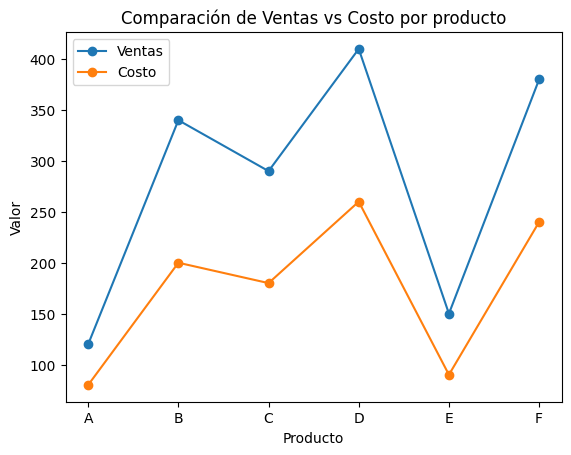

In [16]:
plt.figure()
plt.plot(df["Producto"], df["Ventas"], marker="o", label="Ventas")
plt.plot(df["Producto"], df["Costo"], marker="o", label="Costo")

plt.title("Comparación de Ventas vs Costo por producto")
plt.xlabel("Producto")
plt.ylabel("Valor")
plt.legend()
plt.show()

#Todas las ventas superan los costos, generando ganancia en cada caso y mostrando una relación positiva: a mayor costo, mayores ventas.

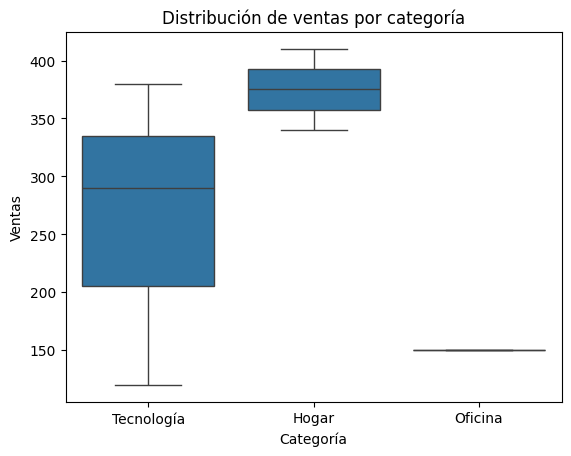

In [18]:
plt.figure()
sns.boxplot(data=df, x="Categoria", y="Ventas")
plt.title("Distribución de ventas por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ventas")
plt.show()

# La categoría Tecnología presenta mayor variabilidad en ventas,ya que el rango entre el valor mínimo y máximo es más amplio y la dispersión de los datos dentro del boxplot es mayor en comparación con las otras categorías.

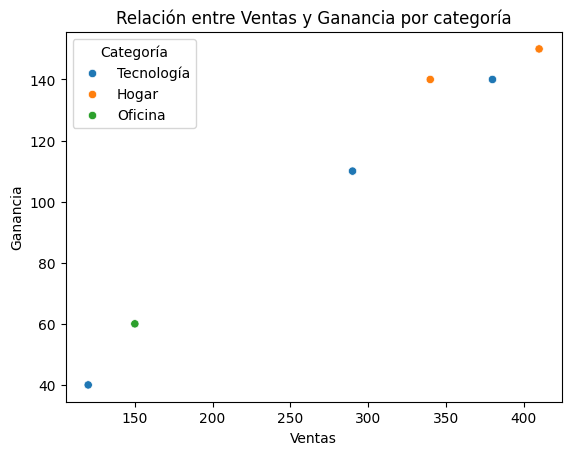

In [20]:
df["Ganancia"] = df["Ventas"] - df["Costo"]

plt.figure()
sns.scatterplot(data=df, x="Ventas", y="Ganancia", hue="Categoria")
plt.title("Relación entre Ventas y Ganancia por categoría")
plt.xlabel("Ventas")
plt.ylabel("Ganancia")
plt.legend(title="Categoría")
plt.show()

# Se observa una relación positiva entre Ventas y Ganancia, es decir, a medida que aumentan las ventas, también aumenta la ganancia.
# Las categorías con mayores ventas, como Tecnología, tienden a tener mayores ganancias. Sin embargo, la relación varía ligeramente entre
# las categorías, mostrando que en algunas, como Oficina, la ganancia no aumenta proporcionalmente con las ventas.